In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc

In [138]:
y["TenYearCHD"].fillna( method ='ffill', inplace = True)
y.isnull().sum()

TenYearCHD    0
dtype: int64

In [146]:
df = pd.read_csv("real name is bad.csv")

x = df.loc[:,["age","sysBP"]]

y = df.loc[:,["TenYearCHD"]]

y["TenYearCHD"].fillna( method ='ffill', inplace = True)

df.dropna(inplace = True)

In [147]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=0)

logr = LogisticRegression()

logr.fit(x_train, y_train)

y_pred = logr.predict(x_test)

y_pred_logistic = logr.decision_function(x_test)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [152]:
auc_score1 = roc_auc_score(y_test,y_pred)

logistic_fpr,logistic_tpr,threshold = roc_curve(y_test, y_pred_logistic)

auc_score1

0.506896551724138

In [149]:
model2 = KNeighborsClassifier()

model2.fit(x_train, y_train)

pred_prob2 = model2.predict_proba(x_test)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [150]:
cm = confusion_matrix(y_test, y_pred)

In [145]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8650943396226415


In [71]:
logistic_fpr,logistic_tpr,threshold

(array([0.        , 0.        , 0.        , 0.00163399, 0.00163399,
        0.00980392, 0.00980392, 0.01633987, 0.01633987, 0.01797386,
        0.01797386, 0.0245098 , 0.0245098 , 0.02614379, 0.02777778,
        0.03431373, 0.03431373, 0.04084967, 0.04084967, 0.04248366,
        0.04575163, 0.04575163, 0.05228758, 0.05392157, 0.05392157,
        0.05718954, 0.05882353, 0.05882353, 0.06045752, 0.0620915 ,
        0.0620915 , 0.06372549, 0.06372549, 0.06535948, 0.07352941,
        0.07352941, 0.07679739, 0.07679739, 0.08660131, 0.08660131,
        0.08823529, 0.08823529, 0.09313725, 0.09313725, 0.09803922,
        0.09803922, 0.0996732 , 0.0996732 , 0.10130719, 0.10130719,
        0.10294118, 0.10294118, 0.1127451 , 0.1127451 , 0.11601307,
        0.11928105, 0.11928105, 0.12091503, 0.12091503, 0.12581699,
        0.12581699, 0.12745098, 0.12745098, 0.13071895, 0.13071895,
        0.13071895, 0.13235294, 0.13235294, 0.1372549 , 0.1372549 ,
        0.14379085, 0.14705882, 0.15196078, 0.15

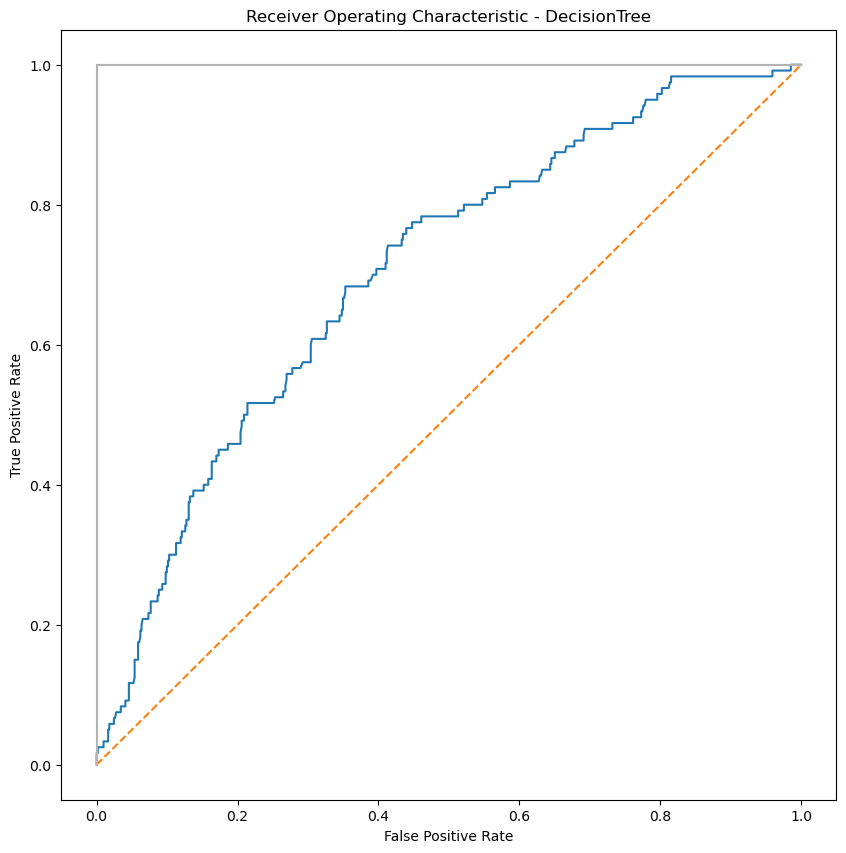

In [73]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(logistic_fpr,logistic_tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()